In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

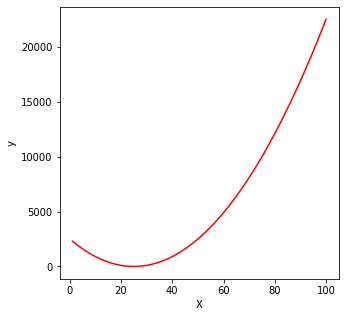

In [9]:
TRUE_W = 2
TRUE_B = -50
X = np.arange(start = 1, stop = 101, step = 1, dtype = np.float32)
y = (X * TRUE_W + TRUE_B) ** 2
plt.figure(figsize=(5,5))
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X,y,color = 'r')

In [10]:
# Normalization of data
X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))


In [15]:
TRAIN_PORTION = int(0.8 * len(X))
X_train = X[:TRAIN_PORTION]
y_train = y[:TRAIN_PORTION]
X_test = X[TRAIN_PORTION:]
y_test = y[TRAIN_PORTION:]

In [23]:
tf.random.set_seed(42)
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = [1]),
    keras.layers.Dense(2,activation='sigmoid'),
    keras.layers.Dense(2, activation='sigmoid'),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mae,
              optimizer = keras.optimizers.Adam(learning_rate=0.1),
              metrics = ['mae','mse'])
model.fit(X, y, epochs= 200,verbose = 1)


Epoch 1/200
4/4 [==============================] - 1s 9ms/step - loss: 0.2546 - mae: 0.2546 - mse: 0.1033
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2262 - mae: 0.2262 - mse: 0.0872
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2141 - mae: 0.2141 - mse: 0.0824
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1956 - mae: 0.1956 - mse: 0.0826
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1693 - mae: 0.1693 - mse: 0.0700
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1398 - mae: 0.1398 - mse: 0.0459
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0994 - mae: 0.0994 - mse: 0.0204
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0627 - mae: 0.0627 - mse: 0.0086
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0341 - mae: 0.0341 - mse: 0.0022
Epoch 10/200
4/4 [============================

 mae : mean absolute error
 $MAE=\frac{\sum_{i = n}^{n}|y_i-x_i|}{n}$

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


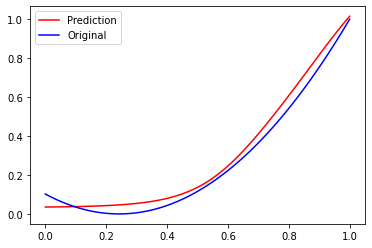

In [25]:
model.summary()
y_pred = model.predict(X)
plt.plot(X,y_pred,color = "red",label = "Prediction")
plt.plot(X,y,color = "blue", label = "Original")
plt.legend()

In [19]:
# evaluate the model
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 53ms/step - loss: 0.0532 - mae: 0.0532 - mse: 0.0032


[0.05319777876138687, 0.05319777876138687, 0.0031923502683639526]

In [22]:
# the output of model.prediction have an extra dimension , sp before calculate it, please squeeze it 
pred_y = model.predict(X_test)
pred_y = tf.squeeze(pred_y,axis=-1)
mae = np.mean(np.abs(pred_y - y_test))
loss = keras.losses.mean_absolute_error(pred_y,y_test)
print(mae,loss)

0.05319778 tf.Tensor(0.05319778, shape=(), dtype=float32)
